In [1]:
import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager
font_path = '/System/Library/Fonts/Supplemental/Songti.ttc'  # 替换为实际的字体文件路径
font = matplotlib.font_manager.FontProperties(fname=font_path)

# 每次用到中文字符的时候，加入 plt.xlabel('年份', fontproperties=font) 后面这个, fontproperties=font

In [9]:
# Mapping from township to county

county_mapping = {
    '110101': '东城区',
    '110102': '西城区',
    '110103': '崇文区',
    '110104': '宣武区',
    '110105': '朝阳区',
    '110106': '丰台区',
    '110107': '石景山区',
    '110108': '海淀区',
    '110109': '门头沟区',
    '110111': '房山区',
    '110112': '通州区',
    '110113': '顺义区',
    '110114': '昌平区',
    '110115': '大兴区',
    '110116': '怀柔区',
    '110117': '平谷区',
    '110228': '密云县',
    '110229': '延庆县',
    '110226': '平谷区',
    '110224': '大兴区',
    '110227': '怀柔区'
}

bj_township = gpd.read_file('bj_townships_2000_epsg4326.shp')

county_df = pd.DataFrame(list(county_mapping.items()), columns=['countycode_2000', 'county_2000'])

# 根据township的gbcode来匹配county
bj_township['countycode_2000'] = bj_township['gbcode'].str[:6]
bj_township = bj_township.merge(county_df, on='countycode_2000', how='left')

# Dissolve based on county 
bj_county = bj_township.dissolve(by='countycode_2000', aggfunc='first')
bj_county = bj_county.reset_index()
bj_county = bj_county[['countycode_2000','geometry','county_2000']]
bj_county.to_file('bj_county_2000_epsg4326..shp')

/var/folders/ps/96tb_jnj4qjf_l9drhcf_sd80000gn/T/ipykernel_6102/2509360641.py:39: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  bj_county.to_file('bj_county_2000_epsg4326..shp')
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'countycode_2000' to 'countycode'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'county_2000' to 'county_200'
  ogr_write(


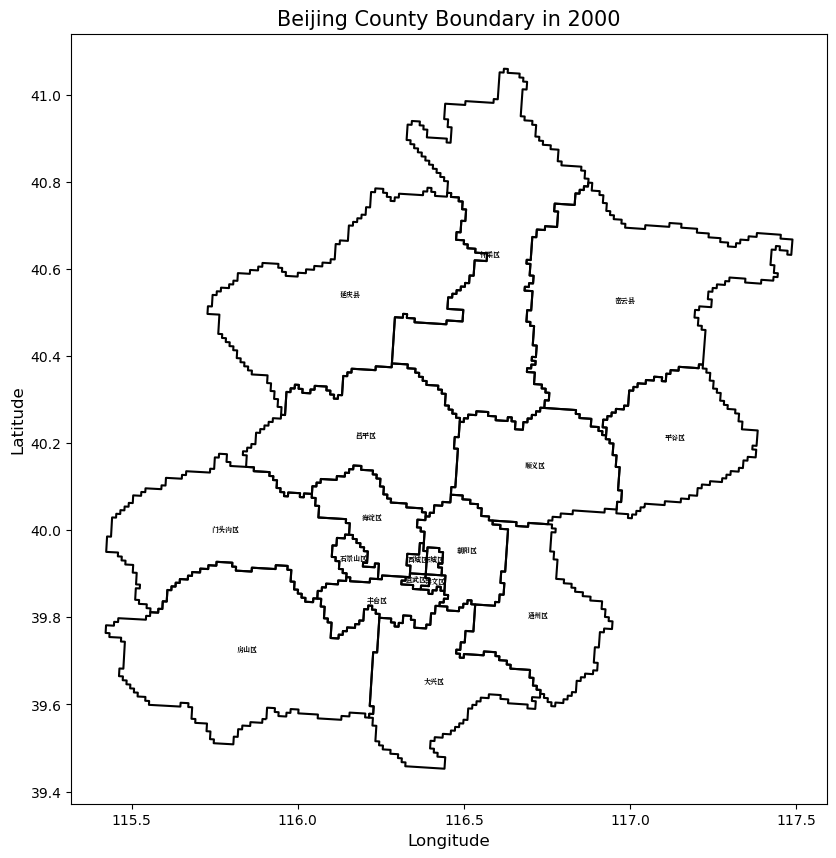

In [7]:
# Plot Check
fig, ax = plt.subplots(figsize=(10, 10))
bj_county.boundary.plot(ax=ax, color='black')  

ax.set_title('Beijing County Boundary in 2000', fontsize=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Adding Label
for idx, row in bj_county.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, row['county_2000'], fontsize=5,  fontproperties=font, ha='center')

plt.show()